In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using TensorFlow backend.


/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train["label"]
X_train = train.drop('label', axis=1)

In [5]:
X_train = X_train / 255.0
test = test / 255.0


In [6]:
X_train = X_train.values.reshape(-1,28,28, 1)
test = test.values.reshape(-1,28,28, 1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [7]:

def display(i):
    img = X_train[i]
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

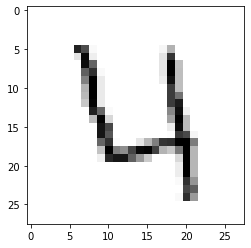

In [8]:
#plt.show(plt.imshow(X_train[1][1]))
display(3)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 123)

In [10]:

ytrain = to_categorical(ytrain, num_classes = 10)
ytest = to_categorical(ytest, num_classes = 10)


In [11]:
#DATA AUGMENTATION
datagen = ImageDataGenerator(featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.1,           
    horizontal_flip=False,
    vertical_flip=False)



In [12]:

datagen.fit(xtrain)

In [13]:
model = Sequential()
#Convolutional Layer
#RELU layer
#Pooling Layer
#Fully connected layer
#Use dropout regularization in between layers
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))


model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(10, activation = "softmax"))


In [14]:
model.compile(loss= 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])


In [15]:
steps_per_epoch = len(xtrain)/ 32

In [16]:
from keras.callbacks import ReduceLROnPlateau
annealer = ReduceLROnPlateau(monitor='val_accuracy', patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [17]:
hist = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),
                           steps_per_epoch= steps_per_epoch,
                           epochs=10, 
                           verbose=2, 
                           validation_data=(xtest, ytest), 
                           callbacks=[annealer])

Epoch 1/10
 - 34s - loss: 0.9372 - accuracy: 0.6868 - val_loss: 0.1671 - val_accuracy: 0.9498
Epoch 2/10
 - 33s - loss: 0.4191 - accuracy: 0.8665 - val_loss: 0.0969 - val_accuracy: 0.9738
Epoch 3/10
 - 34s - loss: 0.3293 - accuracy: 0.8977 - val_loss: 0.0788 - val_accuracy: 0.9779
Epoch 4/10
 - 33s - loss: 0.2853 - accuracy: 0.9113 - val_loss: 0.0684 - val_accuracy: 0.9807
Epoch 5/10
 - 34s - loss: 0.2527 - accuracy: 0.9227 - val_loss: 0.0726 - val_accuracy: 0.9774
Epoch 6/10
 - 33s - loss: 0.2293 - accuracy: 0.9299 - val_loss: 0.0547 - val_accuracy: 0.9833
Epoch 7/10
 - 35s - loss: 0.2208 - accuracy: 0.9319 - val_loss: 0.0521 - val_accuracy: 0.9855
Epoch 8/10
 - 34s - loss: 0.2120 - accuracy: 0.9360 - val_loss: 0.0556 - val_accuracy: 0.9833
Epoch 9/10
 - 34s - loss: 0.1964 - accuracy: 0.9397 - val_loss: 0.0499 - val_accuracy: 0.9831
Epoch 10/10
 - 34s - loss: 0.1888 - accuracy: 0.9421 - val_loss: 0.0455 - val_accuracy: 0.9850

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0

In [18]:
predicted = model.predict(test)
print(predicted)

[[6.29375929e-09 9.84693713e-08 9.99881506e-01 ... 1.10072164e-04
  1.85845738e-06 2.08264828e-06]
 [9.99859691e-01 2.70380218e-10 3.67761299e-06 ... 1.10623759e-07
  2.94754869e-07 3.42044586e-05]
 [2.20275367e-10 7.25882757e-11 4.35926530e-08 ... 1.06349819e-06
  1.84004239e-05 9.99979377e-01]
 ...
 [6.13483359e-16 8.87872328e-12 3.12046389e-10 ... 2.55270027e-09
  1.95959138e-09 2.92140911e-09]
 [1.29579888e-07 1.75099345e-07 3.49683614e-05 ... 3.64580285e-03
  1.12606840e-05 9.95767474e-01]
 [1.10386522e-09 5.02519970e-10 9.99994993e-01 ... 1.49201412e-06
  3.25541055e-06 1.49076314e-07]]


In [19]:

predicted = np.argmax(predicted,axis = 1)
y_pred = pd.Series(predicted,name="Label")
print(y_pred)

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [20]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)
submission.to_csv("submission.csv",index=False)